<a href="https://colab.research.google.com/github/patcon/valency-anndata/blob/main/docs/README.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%pip install --quiet \
  git+https://github.com/patcon/polis-client \
  git+https://github.com/polis-community/red-dwarf@algo-registries \
  git+https://github.com/patcon/valency-anndata

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 647.5/647.5 kB 23.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 174.2/174.2 kB 14.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.7/161.7 kB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.4/55.4 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.1/67.1 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.4/61.4 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.2/58.2 kB 4.9 MB/s eta 0:00:00

## Usage

### Loading Polis Data

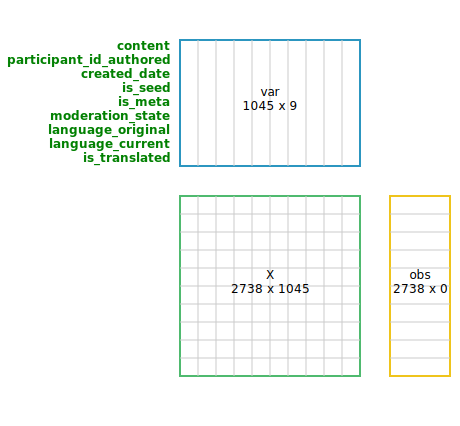

In [2]:
import valency_anndata as val

adata = val.datasets.polis.load("https://pol.is/report/r29kkytnipymd3exbynkd")
val.viz.schematic_diagram(adata, diff_from=None)

### Running Polis Pipelines

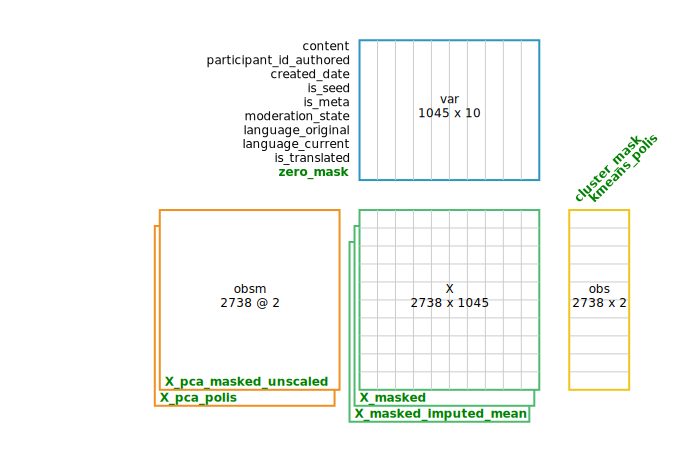

In [3]:
with val.viz.schematic_diagram(diff_from=adata):
    val.tools.recipe_polis(adata, key_added_pca="X_pca_polis")

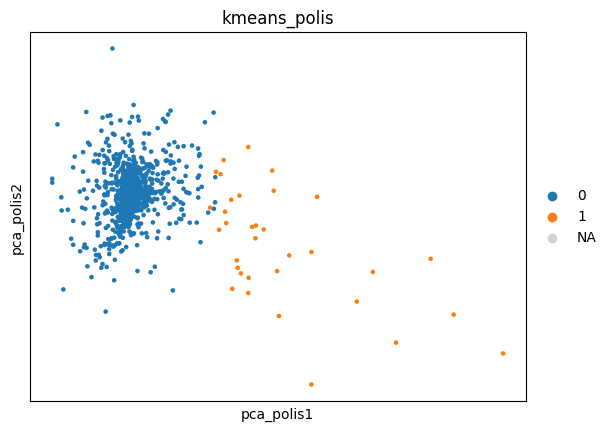

In [4]:
val.viz.embedding(adata, basis="pca_polis", color="kmeans_polis")

### Exploring Polis Pipelines

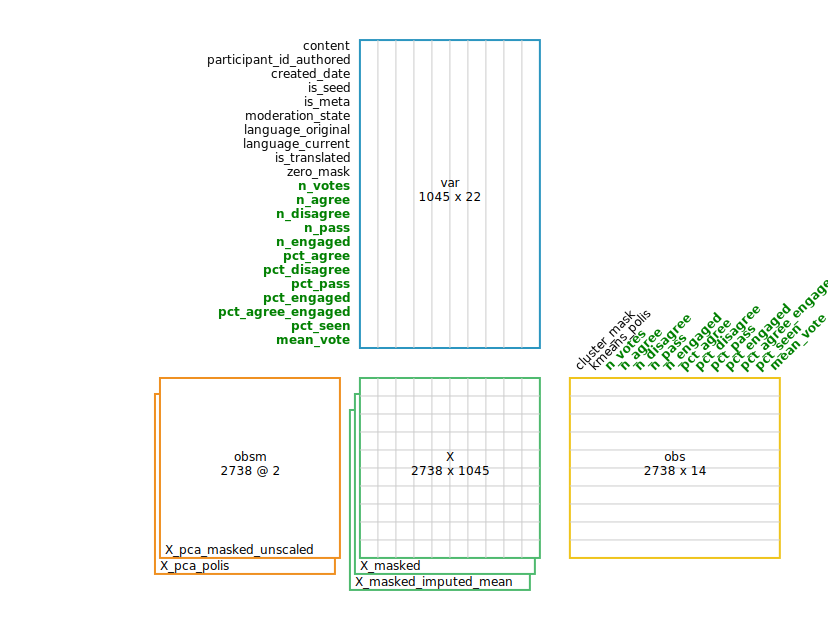

In [5]:
with val.viz.schematic_diagram(diff_from=adata):
    val.preprocessing.calculate_qc_metrics(adata, inplace=True)

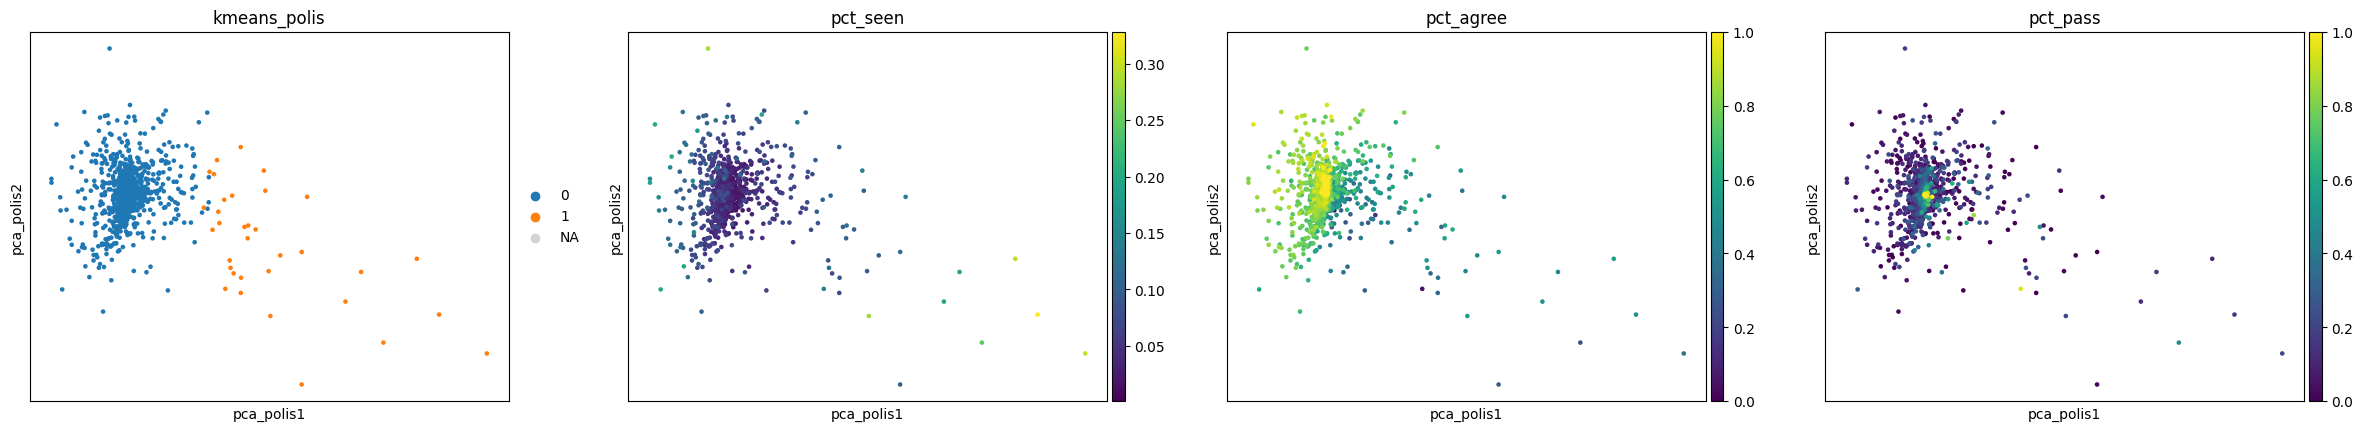

In [6]:
val.viz.embedding(adata, basis="pca_polis",
    color=["kmeans_polis", "pct_seen", "pct_agree", "pct_pass"],
)

### Running & Exploring Alternative Pipelines

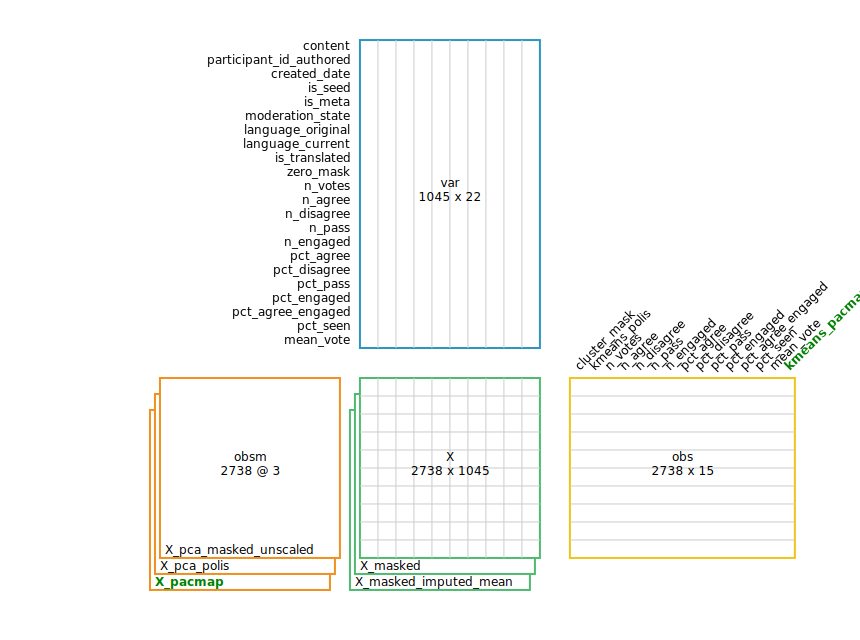

In [7]:
from valency_anndata.tools._polis import _zero_mask, _cluster_mask

with val.viz.schematic_diagram(diff_from=adata):
    _zero_mask(adata)
    val.preprocessing.impute(
        adata,
        strategy="mean",
        source_layer="X_masked",
        target_layer="X_masked_imputed_mean",
    )
    val.tools.pacmap(
        adata,
        key_added="X_pacmap",
        layer="X_masked_imputed_mean",
    )
    _cluster_mask(adata)
    val.tools.kmeans(
        adata,
        k_bounds=(2, 9),
        init="polis",
        use_rep="X_pacmap",
        mask_obs="cluster_mask",
        key_added="kmeans_pacmap",
    )

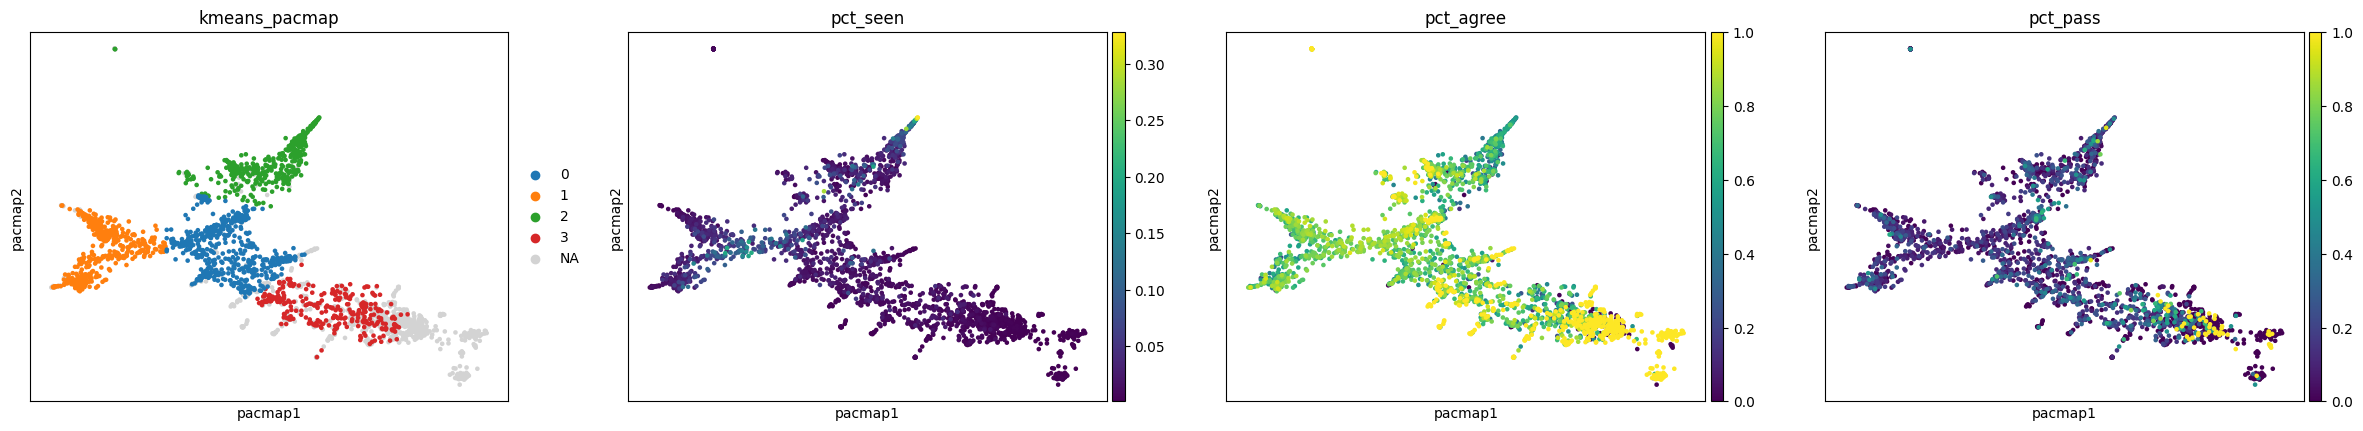

In [8]:
val.viz.embedding(adata, basis="pacmap",
    color=["kmeans_pacmap", "pct_seen", "pct_agree", "pct_pass"],
)